<a href="https://colab.research.google.com/github/NOTGOD6000/Indian_food_image_classification/blob/main/indian_food_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before we start, let's install the `datasets` and `transformers` libraries. both are hugging face lib ,the datasets is used for managing dataset and transformers used for providing models from hugging face in both cases


In [1]:
!pip install -q datasets transformers
import os

**LOGIN**

In [2]:
from huggingface_hub import notebook_login

notebook_login()


Then you need to install Git-LFS to upload your model checkpoints:
git was designed to store code/text files . for ml pj it makes clonnigslow,rep size huge.
git large file storage  stores large file outside the main git repo, the large file is stored on a remote LFS server

In [3]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

## Importing data into Hugging Face hub and datasets (optional)

The following is how you start with raw images and upload them into Hugging Face datasets.  For this project, if you just want to start training on the indian foods dataset, you can skip this portion of the notebook.
I started by gettig the raw image data from [Kaggle](https://www.kaggle.com/datasets/l33tc0d3r/indian-food-classification?resource=download-directory).  I put the images into my Google drive and copied it over to my Google Colab instance.  You will have to change the origin folder to your location

In [4]:
#Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip "/content/drive/MyDrive/FoodClassification.zip" -d /tmp/foodimg


Streaming output truncated to the last 5000 lines.
  inflating: /tmp/foodimg/Food Classification/chapati/253.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/254.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/255.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/256.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/257.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/258.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/259.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/260.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/261.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/262.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/263.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/264.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/265.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati/266.jpg  
  inflating: /tmp/foodimg/Food Classification/chapati

We will use the [🤗 Datasets](https://github.com/huggingface/datasets) library's [ImageFolder](https://huggingface.co/docs/datasets/v2.0.0/en/image_process#imagefolder) feature to download our custom dataset into a DatasetDict.

In [7]:
from datasets import load_dataset
ds = load_dataset("imagefolder", data_dir="/tmp/foodimg")
ds = ds['train']

Resolving data files:   0%|          | 0/6271 [00:00<?, ?it/s]

I next want to randomly created a test split for validating the model so 15% for test and 85 for training

In [8]:
data = ds.train_test_split(test_size=0.15)

In [9]:
data

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5328
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 941
    })
})

Let's now push this dataset to the Hugging face public hub.  This provides a place where this data is saved and can always be called back later.  You should change the location from `rajistics` to your account.

In [ ]:
!pip install --upgrade huggingface_hub



In [ ]:
import os
from huggingface_hub.constants import HF_TOKEN_PATH

# Delete env var
if "HF_TOKEN" in os.environ:
    del os.environ["HF_TOKEN"]

# Delete Colab-stored token file if it exists
if os.path.exists(HF_TOKEN_PATH):
    os.remove(HF_TOKEN_PATH)


In [10]:
from huggingface_hub import whoami
print(whoami())


{'type': 'user', 'id': '6870cec1585c38a0cd0c579e', 'name': 'NOTGOD6000', 'fullname': 'Sehaj', 'email': 'sehajjotsinghkahlon@gmail.com', 'emailVerified': True, 'canPay': False, 'periodEnd': None, 'isPro': False, 'avatarUrl': '/avatars/77a733374b4ed6c6c3d75bd27b9a67bb.svg', 'orgs': [], 'auth': {'type': 'access_token', 'accessToken': {'displayName': 'image', 'role': 'write', 'createdAt': '2025-08-31T13:47:57.570Z'}}}


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [11]:
data.push_to_hub("NOTGOD6000/indian_food_images")

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ? shards/s]

Map:   0%|          | 0/1776 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  525kB /  456MB            

Map:   0%|          | 0/1776 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  487kB /  468MB            

Map:   0%|          | 0/1776 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          | 1.67MB /  455MB            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Map:   0%|          | 0/941 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   1%|          | 1.30MB /  223MB            

CommitInfo(commit_url='https://huggingface.co/datasets/NOTGOD6000/indian_food_images/commit/3da11a8000b2bd89f10a8c7edbe5fe0481f7c519', commit_message='Upload dataset', commit_description='', oid='3da11a8000b2bd89f10a8c7edbe5fe0481f7c519', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/NOTGOD6000/indian_food_images', endpoint='https://huggingface.co', repo_type='dataset', repo_id='NOTGOD6000/indian_food_images'), pr_revision=None, pr_num=None)

## Accessing the Indian Foods dataset from the public hub

This copies down the dataset from the Hugging Face public hub into your notebook.  For large datasets, look at options like streaming the dataset. meaning in future i can again access this dataset directly from my acc

In [12]:
data = load_dataset("NOTGOD6000/indian_food_images")

README.md:   0%|          | 0.00/958 [00:00<?, ?B/s]

data/train-00000-of-00003.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

data/train-00001-of-00003.parquet:   0%|          | 0.00/468M [00:00<?, ?B/s]

data/train-00002-of-00003.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/223M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5328 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/941 [00:00<?, ? examples/s]

Let's look at a sample image

In [13]:
ex = data['train'][400]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=540x400>,
 'label': 0}

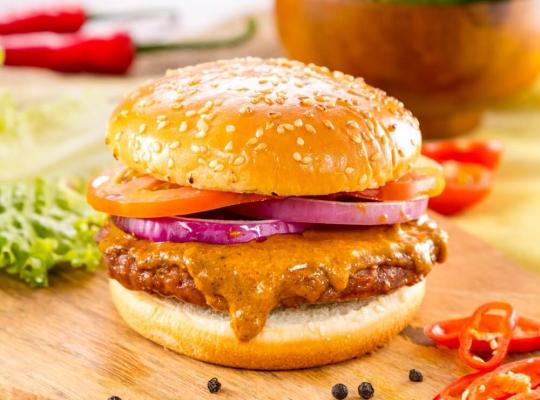

In [14]:
image = ex['image']
image

In [15]:
labels = data['train'].features['label']
labels

ClassLabel(names=['burger', 'butter_naan', 'chai', 'chapati', 'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice', 'idli', 'jalebi', 'kaathi_rolls', 'kadai_paneer', 'kulfi', 'masala_dosa', 'momos', 'paani_puri', 'pakode', 'pav_bhaji', 'pizza', 'samosa'])

In [16]:
labels.int2str(ex['label'])

'burger'

## Fine-tuning a model on an image classification task

Next, let's fine-tune one of the [🤗 Transformers](https://github.com/huggingface/transformers) vision models on the Indian Food dataset.


Let us also load the Accuracy metric, which we'll use to evaluate our model both during and after training.

In [20]:
#from datasets import load_metric # deprecated

from evaluate import load

metric = load("accuracy")

The `dataset` object itself is a [`DatasetDict`](https://huggingface.co/docs/datasets/package_reference/main_classes.html#datasetdict), which contains one key per split (in this case, only "train" for a training split).

In [21]:
data

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5328
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 941
    })
})

Another prepatory step is to create an `id2label` dictionary to decode them back to strings and see what they are. The inverse `label2id` will be useful too, when we load the model later.

In [22]:
labels = data["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

### Preprocessing the data

In [23]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Before we can feed these images to our model, we need to preprocess them.

Preprocessing images typically comes down to (1) resizing them to a particular size (2) normalizing the color channels (R,G,B) using a mean and standard deviation. These are referred to as **image transformations**.

In addition, one typically performs what is called **data augmentation** during training (like random cropping and flipping) to make the model more robust and achieve higher accuracy. Data augmentation is also a great technique to increase the size of the training data.

We will use `torchvision.transforms` for the image transformations/data augmentation in this tutorial, but note that one can use any other package (like [albumentations](https://albumentations.ai/), [imgaug](https://github.com/aleju/imgaug), [Kornia](https://kornia.readthedocs.io/en/latest/) etc.).

To make sure we (1) resize to the appropriate size (2) use the appropriate image mean and standard deviation for the model architecture we are going to use, we instantiate what is called a feature extractor with the `AutoFeatureExtractor.from_pretrained` method.

This feature extractor is a minimal preprocessor that can be used to prepare images for inference.

The Datasets library is made for processing data very easily. We can write custom functions, which can then be applied on an entire dataset (either using [`.map()`](https://huggingface.co/docs/datasets/package_reference/main_classes.html?highlight=map#datasets.Dataset.map) or [`.set_transform()`](https://huggingface.co/docs/datasets/package_reference/main_classes.html?highlight=set_transform#datasets.Dataset.set_transform)).

Here we define 2 separate functions, one for training (which includes data augmentation) and one for validation (which only includes resizing, center cropping and normalizing).

In [25]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
train_transforms = Compose(
        [
            RandomResizedCrop(feature_extractor.size['height']),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

val_transforms = Compose(
        [
            Resize((feature_extractor.size['height'], feature_extractor.size['width'])),
            CenterCrop((feature_extractor.size['height'], feature_extractor.size['width'])),
            ToTensor(),
            normalize,
        ]
    )

def preprocess_train(example_batch):
    """Apply train_transforms across a batch."""
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch

def preprocess_val(example_batch):
    """Apply val_transforms across a batch."""
    example_batch["pixel_values"] = [val_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch

Next, we can preprocess our dataset by applying these functions. We will use the `set_transform` functionality, which allows to apply the functions above on-the-fly (meaning that they will only be applied when the images are loaded in RAM).

In [26]:
# split up training into training + validation
train_ds = data['train']
val_ds = data['test']

In [27]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)

Let's access an element to see that we've added a "pixel_values" feature:

In [28]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x900>,
 'label': 18,
 'pixel_values': tensor([[[ 0.2157,  0.2078,  0.2078,  ...,  0.8902,  0.8902,  0.8824],
          [ 0.1686,  0.1294,  0.1137,  ...,  0.8902,  0.8902,  0.8902],
          [ 0.2235,  0.1765,  0.1451,  ...,  0.8824,  0.8980,  0.8902],
          ...,
          [ 0.3490,  0.3333,  0.3020,  ..., -0.3333, -0.5451, -0.7569],
          [ 0.3725,  0.3804,  0.3569,  ..., -0.3882, -0.5137, -0.6706],
          [ 0.3804,  0.4118,  0.4118,  ..., -0.4353, -0.4353, -0.5137]],
 
         [[ 0.1373,  0.1294,  0.1294,  ...,  0.1686,  0.2235,  0.2392],
          [ 0.0118, -0.0039, -0.0118,  ...,  0.1529,  0.2078,  0.2392],
          [-0.0431, -0.0588, -0.0745,  ...,  0.1059,  0.1608,  0.1843],
          ...,
          [ 0.0039,  0.0039, -0.0039,  ..., -0.4980, -0.7020, -0.8588],
          [ 0.0118,  0.0196,  0.0196,  ..., -0.5608, -0.6627, -0.7725],
          [ 0.0196,  0.0275,  0.0275,  ..., -0.6078, -0.5922, -0.6157

### Training the model

Now that our data is ready, we can download the pretrained model and fine-tune it. For classification we use the `AutoModelForImageClassification` class. Calling the `from_pretrained` method on it will download and cache the weights for us. As the label ids and the number of labels are dataset dependent, we pass `label2id`, and `id2label` alongside the `model_checkpoint` here. This will make sure a custom classification head will be created (with a custom number of output neurons).

NOTE: in case you're planning to fine-tune an already fine-tuned checkpoint, like [facebook/convnext-tiny-224](https://huggingface.co/facebook/convnext-tiny-224) (which has already been fine-tuned on ImageNet-1k), then you need to provide the additional argument `ignore_mismatched_sizes=True` to the `from_pretrained` method. This will make sure the output head (with 1000 output neurons) is thrown away and replaced by a new, randomly initialized classification head that includes a custom number of output neurons. You don't need to specify this argument in case the pre-trained model doesn't include a head.

In [ ]:
#uses googlevision model

In [29]:
from transformers import ViTForImageClassification
model_name_or_path = 'google/vit-base-patch16-224-in21k'
model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


The warning is telling us we are throwing away some weights (the weights and bias of the `classifier` layer) and randomly initializing some other (the weights and bias of a new `classifier` layer). This is expected in this case, because we are adding a new head for which we don't have pretrained weights, so the library warns us we should fine-tune this model before using it for inference, which is exactly what we are going to do.

To instantiate a `Trainer`, we will need to define the training configuration and the evaluation metric. The most important is the [`TrainingArguments`](https://huggingface.co/transformers/main_classes/trainer.html#transformers.TrainingArguments), which is a class that contains all the attributes to customize the training. It requires one folder name, which will be used to save the checkpoints of the model.

Most of the training arguments are pretty self-explanatory, but one that is quite important here is `remove_unused_columns=False`. This one will drop any features not used by the model's call function. By default it's `True` because usually it's ideal to drop unused feature columns, making it easier to unpack inputs into the model's call function. But, in our case, we need the unused features ('image' in particular) in order to create 'pixel_values'.

In [31]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    'finetuned-indian-food',
  per_device_train_batch_size=16,
  eval_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=True,
  report_to='tensorboard',
  load_best_model_at_end=True,
  hub_strategy="end"
)

Here we set the evaluation to be done at the end of each epoch, tweak the learning rate, use the `batch_size` defined at the top of the notebook and customize the number of epochs for training, as well as the weight decay. Since the best model might not be the one at the end of training, we ask the `Trainer` to load the best model it saved (according to `metric_name`) at the end of training.

The last argument `push_to_hub` allows the Trainer to push the model to the [Hub](https://huggingface.co/models) regularly during training. Remove it if you didn't follow the installation steps at the top of the notebook. If you want to save your model locally with a name that is different from the name of the repository, or if you want to push your model under an organization and not your name space, use the `hub_model_id` argument to set the repo name (it needs to be the full name, including your namespace: for instance `"nielsr/vit-finetuned-cifar10"` or `"huggingface/nielsr/vit-finetuned-cifar10"`).

Next, we need to define a function for how to compute the metrics from the predictions, which will just use the `metric` we loaded earlier. The only preprocessing we have to do is to take the argmax of our predicted logits:

In [32]:
import numpy as np

# the compute_metrics function takes a Named Tuple as input:
# predictions, which are the logits of the model as Numpy arrays,
# and label_ids, which are the ground-truth labels as Numpy arrays.
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

We also define a `collate_fn`, which will be used to batch examples together.
Each batch consists of 2 keys, namely `pixel_values` and `labels`.

In [33]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

Then we just need to pass all of this along with our datasets to the `Trainer`:

In [34]:
from transformers import Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

/tmp/ipython-input-963735583.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


You might wonder why we pass along the `feature_extractor` as a tokenizer when we already preprocessed our data. This is only to make sure the feature extractor configuration file (stored as JSON) will also be uploaded to the repo on the hub.

Now we can finetune our model by calling the `train` method:

In [35]:
train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

Step,Training Loss,Validation Loss,Accuracy
100,0.996900,0.915661,0.838470
200,0.753000,0.713375,0.833156
300,0.524100,0.474745,0.886291
400,0.492300,0.410001,0.909671
500,0.478600,0.316594,0.925611
600,0.373800,0.335524,0.905420
700,0.330000,0.427718,0.880978
800,0.390500,0.291289,0.921360
900,0.235200,0.271010,0.937301
1000,0.248400,0.265531,0.924548


Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...tuned-indian-food/model.safetensors:   0%|          |  553kB /  343MB            

  ...vents.1756651212.bbd43e140c7a.156.0:  27%|##7       | 10.5kB / 38.3kB            

  ...tuned-indian-food/training_args.bin:  27%|##7       | 1.59kB / 5.78kB            

***** train metrics *****
  epoch                    =          4.0
  total_flos               = 1538336014GF
  train_loss               =       0.4703
  train_runtime            =   0:21:03.03
  train_samples_per_second =       16.874
  train_steps_per_second   =        1.055


We can check with the `evaluate` method that our `Trainer` did reload the best model properly (if it was not the last one):

In [36]:
metrics = trainer.evaluate()
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.9416
  eval_loss               =      0.234
  eval_runtime            = 0:00:22.53
  eval_samples_per_second =      41.75
  eval_steps_per_second   =      5.235


You can now upload the result of the training to the Hub, just execute this instruction (note that the Trainer will automatically create a model card as well as Tensorboard logs - see the "Training metrics" tab - amazing isn't it?):

In [37]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'indian_food_images',
    "tags": ['image-classification'],
}

if training_args.push_to_hub:
    trainer.push_to_hub('🍻 cheers', **kwargs)
else:
    trainer.create_model_card(**kwargs)

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...tuned-indian-food/training_args.bin: 100%|##########| 5.78kB / 5.78kB            

  ...vents.1756651212.bbd43e140c7a.156.0: 100%|##########| 38.3kB / 38.3kB            

  ...tuned-indian-food/model.safetensors:  10%|9         | 33.5MB /  343MB            

  ...vents.1756652771.bbd43e140c7a.156.1: 100%|##########|   411B /   411B            

You can now share this model with all your friends, family, favorite pets: they can all load it with the identifier `"your-username/the-name-you-picked"` so for instance:

```python
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("NOTGOD6000/finetuned-indian-food")
model = AutoModelForImageClassification.from_pretrained("NOTGOD6000/finetuned-indian-food")

```

In [39]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("NOTGOD6000/finetuned-indian-food")
model = AutoModelForImageClassification.from_pretrained("NOTGOD6000/finetuned-indian-food")

preprocessor_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

## Inference

Let's say you have a new image, on which you'd like to make a prediction. Let's load a image of XYZ and see how the model does.

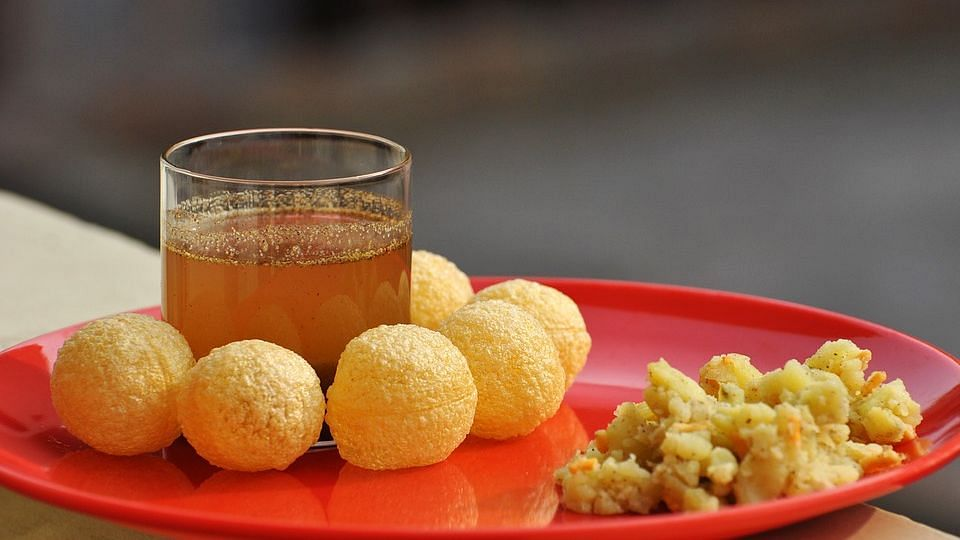

In [40]:
from PIL import Image
import requests

url = 'https://huggingface.co/rajistics/finetuned-indian-food/resolve/main/126.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image

We'll load the feature extractor and model from the hub (here, we use the [Auto Classes](https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoModelForImageClassification), which will make sure the appropriate classes will be loaded automatically based on the `config.json` and `preprocessor_config.json` files of the repo on the hub):

In [41]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

repo_name = "NOTGOD6000/finetuned-indian-food"

feature_extractor = AutoFeatureExtractor.from_pretrained(repo_name)
model = AutoModelForImageClassification.from_pretrained(repo_name)

In [42]:
# prepare image for the model
encoding = feature_extractor(image.convert("RGB"), return_tensors="pt")
print(encoding.pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [43]:
import torch

# forward pass
with torch.no_grad():
  outputs = model(**encoding)
  logits = outputs.logits

In [44]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: paani_puri


Looks like our model got it correct!

## Pipeline API

An alternative way to quickly perform inference with any model on the hub is by leveraging the [Pipeline API](https://huggingface.co/docs/transformers/main_classes/pipelines), which abstracts away all the steps we did manually above for us. It will perform the preprocessing, forward pass and postprocessing all in a single object.

Let's showcase this for our trained model:

In [45]:
from transformers import pipeline
pipe = pipeline("image-classification", "NOTGOD6000/finetuned-indian-food")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [46]:
url = 'https://huggingface.co/rajistics/finetuned-indian-food/resolve/main/126.jpg'
image = Image.open(requests.get(url, stream=True).raw)

pipe(image)

[{'label': 'paani_puri', 'score': 0.9673182368278503},
 {'label': 'chai', 'score': 0.002932996489107609},
 {'label': 'chole_bhature', 'score': 0.002377753611654043},
 {'label': 'jalebi', 'score': 0.002297593979164958},
 {'label': 'idli', 'score': 0.0022361536975950003}]

As we can see, it does not only show the class label with the highest probability, but does return the top 5 labels, with their corresponding scores. Note that the pipelines also work with local models and feature extractors:

In [47]:
pipe = pipeline("image-classification",
                model=model,
                feature_extractor=feature_extractor)

Device set to use cuda:0


In [48]:
pipe(image)

[{'label': 'paani_puri', 'score': 0.9673182368278503},
 {'label': 'chai', 'score': 0.002932996489107609},
 {'label': 'chole_bhature', 'score': 0.002377753611654043},
 {'label': 'jalebi', 'score': 0.002297593979164958},
 {'label': 'idli', 'score': 0.0022361536975950003}]